# 1. Data Visualization
In this project, we will visualize the ultrasound data by the heatmap, grayscale image and color image respectively. 

## 1.1 Reading data
- First, the raw ultrasound data will be read from the csv file. The original distances measured by the ultrasonic sensors are represented in x and y directions wrt the robot coordinate respectively. 
- Second, the Euclid distances between the robot and obstacle at every measuring time are computed. At every measuring time, a list of 16 distances is regard as one record.  
- Overall, the input is the path of the csv file and the output is a two dimensional distance array and a label array.
- The front sonar is [0~7] clockwise left to right and the rear sonar is [8~15] clockwise right to left

In [1]:
import csv
from math import sqrt
import numpy as np

def data_read(csv_path):
    print("Reading ultrasound data from csv file...")
    
    # init empty lists to save data
    Distance = []
    angular  = []
    
    with open(csv_path, 'r') as f:
        f_reader = csv.reader(f)
        for line in f_reader:
            Distance.append([sqrt(float(line[i])**2 + float(line[i+16])**2) for i in range(16)])
            angular.append(float(line[33]))
    
    # convert the data list to numpy array
    Distance = np.array(Distance) 
    angular = np.array(angular)
    
    print("Reading is done.")
    print("The shape of Distance array is {}, {}".format(Distance.shape, Distance.dtype))
    print("The shape of angular velocity array is {}, {}".format(angular.shape, angular.dtype))
    
    return Distance, angular

In [2]:
dataset_path = "/media/ubuntu16/Documents/datasets/SonarSet/SIM/Track-I/"
csv_name    = "2019-06-06.csv"
csv_path    =  dataset_path + csv_name

D, agl = data_read(csv_path)

Reading ultrasound data from csv file...
Reading is done.
The shape of Distance array is (6509, 16), float64
The shape of angular velocity array is (6509,), float64


## 1.2 Correlation Matrix Map

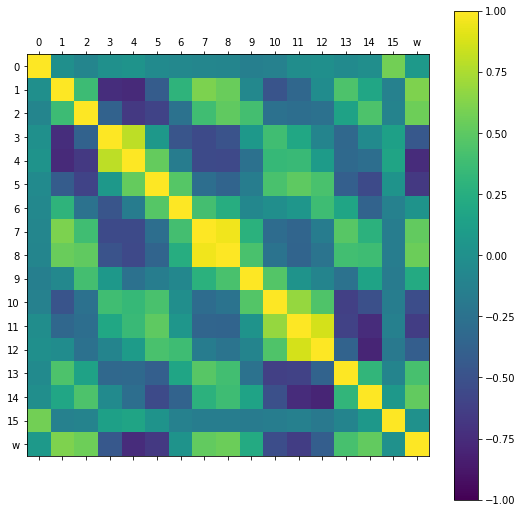

In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

D_corr = np.column_stack((D,agl))
df = pd.DataFrame(D_corr) # 将numpy数组转为df
correlations = df.corr() # 计算变量之间的相关系数矩阵

# plot correlation matrix
fig, ax = plt.subplots(figsize=(9,9)) #调用figure创建一个绘图对象

cax = ax.matshow(correlations, vmin=-1, vmax=1)  #绘制热力图，从-1到1

fig.colorbar(cax)  #将matshow生成热力图设置为颜色渐变条
ticks = np.arange(0,17,1) #生成0-9，步长为1
names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','w']
ax.set_xticks(ticks)  #生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names) #生成x轴标签
ax.set_yticklabels(names)
plt.show()

## 1.3 Grayscale image
- The straight road segment (the left side of the car passed two doors): the sequence 0~300 was used.
- The left turning segment: sequence 300~500. (exactly is 370~430)

In [38]:
# The imwrite method in imageio does a lossy conversion from float64 to uint8 
# when we saving numpy array in float as an image.
# 关键是这种归一化还不是统一的，每张 图片各自根据自己的最大最小值归一化到（0~255）之间
# 所以为了统一，我们可以提前将整个数据集转成uint8,然后再保存图片。

from imageio import imwrite, imread
import datetime

def array_to_gray(data, height, image_path):
    
    data_num, _= data.shape
    
    # the index of the last image is [data_num-height, data_num]
    # data_num-height+1 images will be saved
    for i in range(data_num-height+1):
        image_name = image_path + str(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S_%f")+".jpg")
        imwrite(image_name, data[i:i+height])
        
    
    print("{} gray images have been saved.".format(data_num-height+1))

In [68]:
gray_image_path = "/media/ubuntu16/Documents/datasets/SonarSet/SIM/Track-I/gray/"
D_straight = D[0:300]
D_turning = D[300:500]
height = 16

# saving straight road segment data to grayscale image
array_to_gray(D_straight, height, gray_image_path)

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.1681670850970

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

285 gray images have been saved.


In [69]:
# saving turning segment data to grayscale image
array_to_gray(D_turning, height, gray_image_path)

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. C

Lossy conversion from float64 to uint8. Range [0.8787132508188324, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8787132508188324, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8787132508188324, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8787132508188324, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8787132508188324, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8787132508188324, 5.1681670850970765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8787132508188324, 5.1681670850970

185 gray images have been saved.


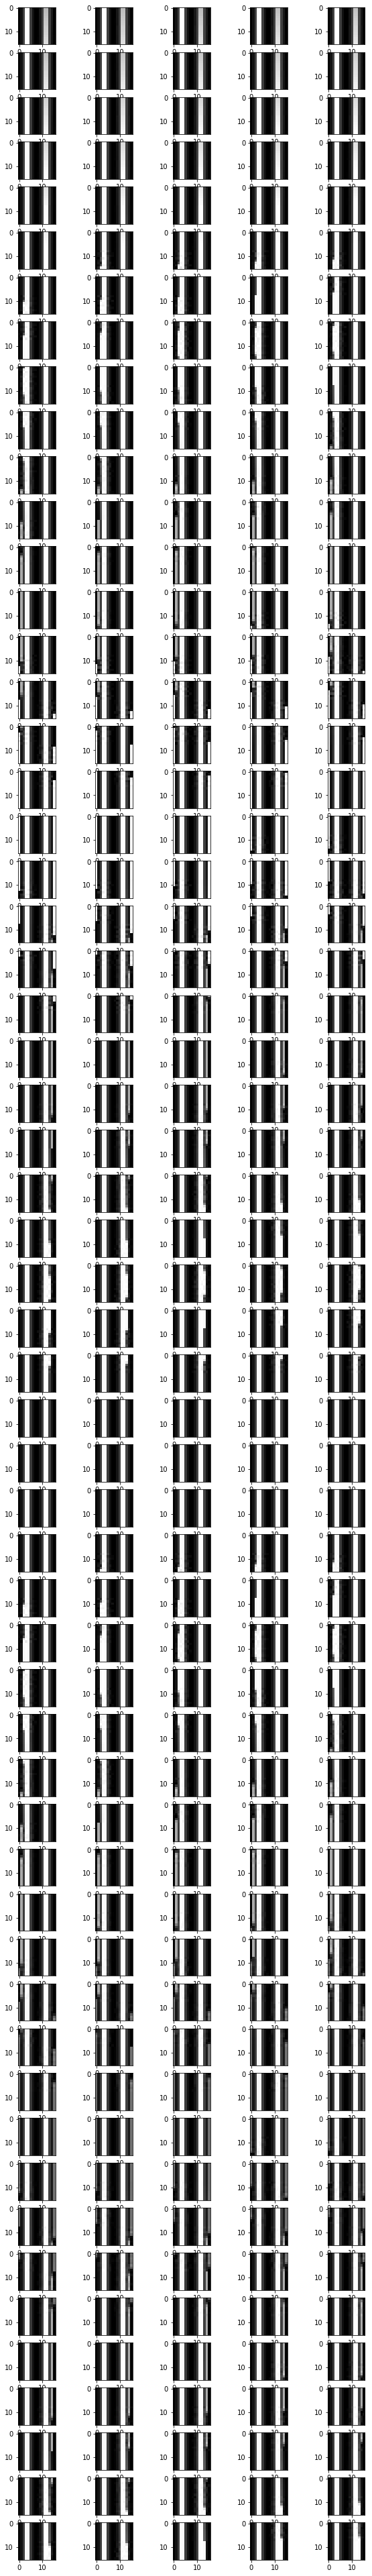

In [76]:
import os
from math import ceil
import matplotlib.pyplot as plt

gray_image_path = "/media/ubuntu16/Documents/datasets/SonarSet/SIM/Track-I/gray/"
image_list = os.listdir(gray_image_path)
image_list.sort()

img_to_show = [gray_image_path+img_name for img_name in image_list[0:285]]
num = len(img_to_show)

fig, axes = plt.subplots(ceil(num/5),5,figsize=(10,70))

index=0
for i in range(ceil(num/5)):
    for j in range(5):
        if index == num:
            break
        else:
            img = imread(img_to_show[index])
            axes[i][j].imshow(img ,cmap='gray')
            index+=1

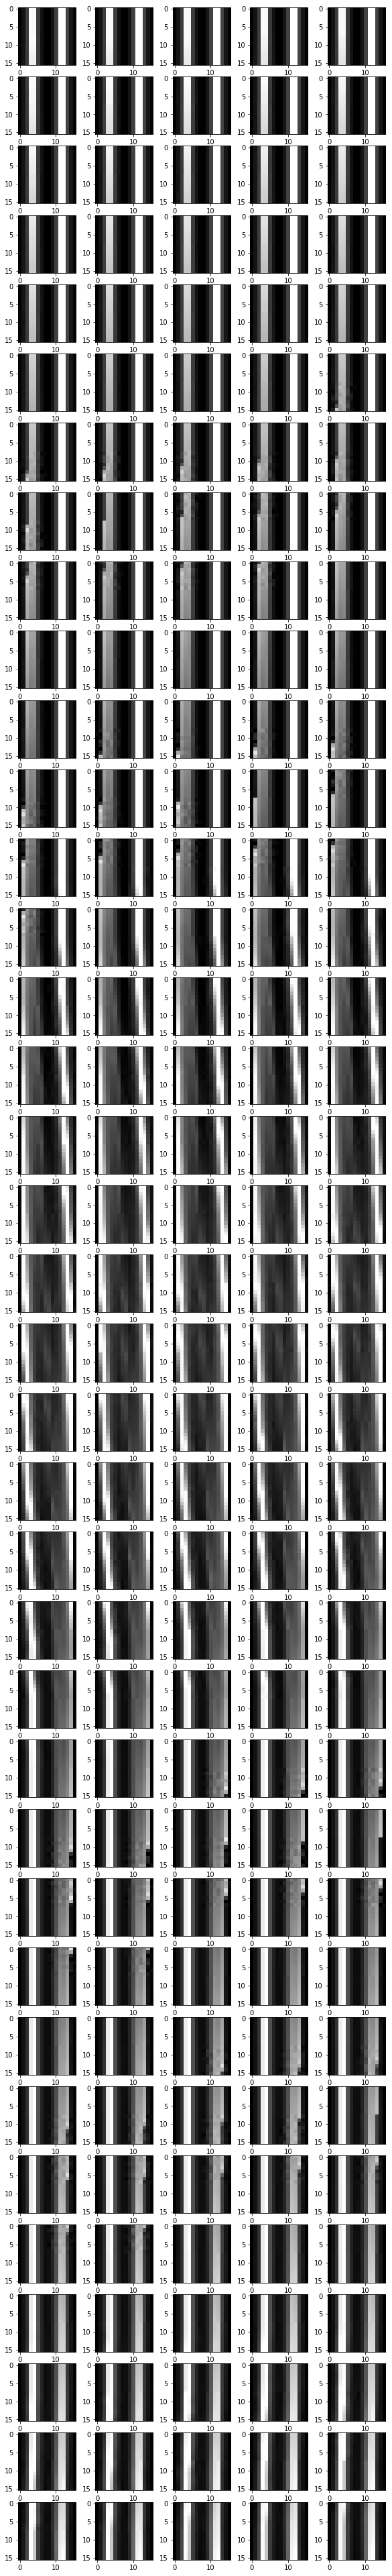

In [77]:
img_to_show = [gray_image_path+img_name for img_name in image_list[285:470]]
num = len(img_to_show)

fig, axes = plt.subplots(ceil(num/5),5,figsize=(10,70))

index=0
for i in range(ceil(num/5)):
    for j in range(5):
        if index == num:
            break
        else:
            img = imread(img_to_show[index])
            axes[i][j].imshow(img ,cmap='gray')
            index+=1

## 1.4 Color image
- Stacking three two dimensional as a three dimensional tensor (H,W,C)
- The three channels R, G, and B are sequences 0~16, 16~32, 32~48 respectively.

In [12]:
from imageio import imwrite, imread
import datetime
import numpy as np

# the sequence value be multiples of 3
def array_to_color(data, sequence, image_path):
    
    data_num, _= data.shape
    height = sequence//3
    
    # the index of the last image is [data_num-height, data_num]
    # data_num-height+1 images will be saved
    for i in range(data_num-sequence+1):
        image_name = image_path + str(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S_%f")+".jpg")
        img_list = [data[i:i+height], data[i+height:i+2*height], data[i+2*height:i+3*height]]
        img_array = np.stack(img_list, axis=2)
        imwrite(image_name, img_array)
        
    
    print("{} color images have been saved.".format(data_num-sequence+1))

In [13]:
color_image_path = "/media/ubuntu16/Documents/datasets/SonarSet/SIM/Track-I/color/"
D_straight = D[0:300]
D_turning = D[300:500]
sequence = 48

# saving straight road segment data to color image
array_to_color(D_straight, sequence, color_image_path)

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

253 color images have been saved.


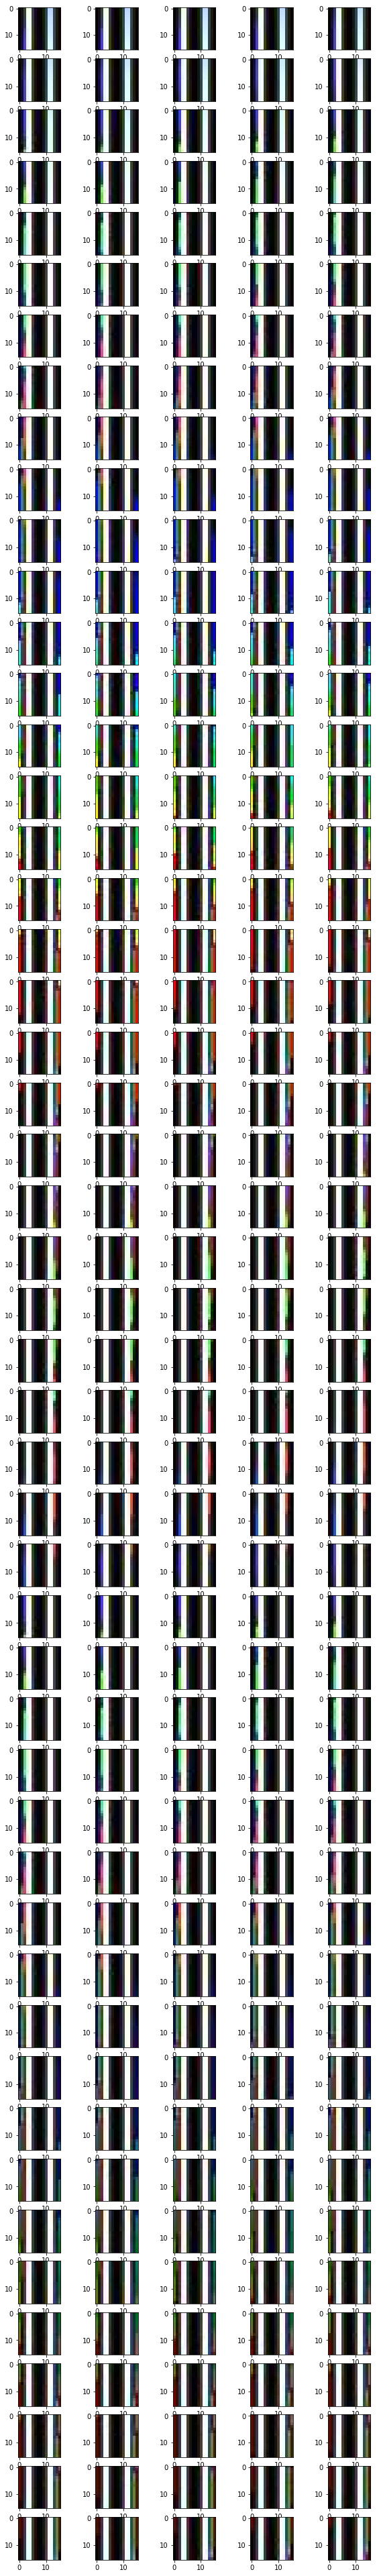

In [20]:
import os
from math import floor
import matplotlib.pyplot as plt

color_image_path = "/media/ubuntu16/Documents/datasets/SonarSet/SIM/Track-I/color/"
image_list = os.listdir(color_image_path)
image_list.sort()

img_to_show = [color_image_path+img_name for img_name in image_list[0:253]]
num = len(img_to_show)

fig, axes = plt.subplots(floor(num/5),5,figsize=(10,70))

index=0
for i in range(floor(num/5)):
    for j in range(5):
        img = imread(img_to_show[index])
        axes[i][j].imshow(img)
        index+=1

In [22]:
# saving turning segment data to color image
array_to_color(D_turning, sequence, color_image_path)

Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9824260975775228, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.7870304743918118, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.7740814185076403, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.7740814185076403, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.7740814185076403, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.7740814185076403, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.7740814185076403, 5.255844485264316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.7740814185076403, 5.255844485264316]. C

Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.8182041058028251, 5.222243074852332]. C

153 color images have been saved.


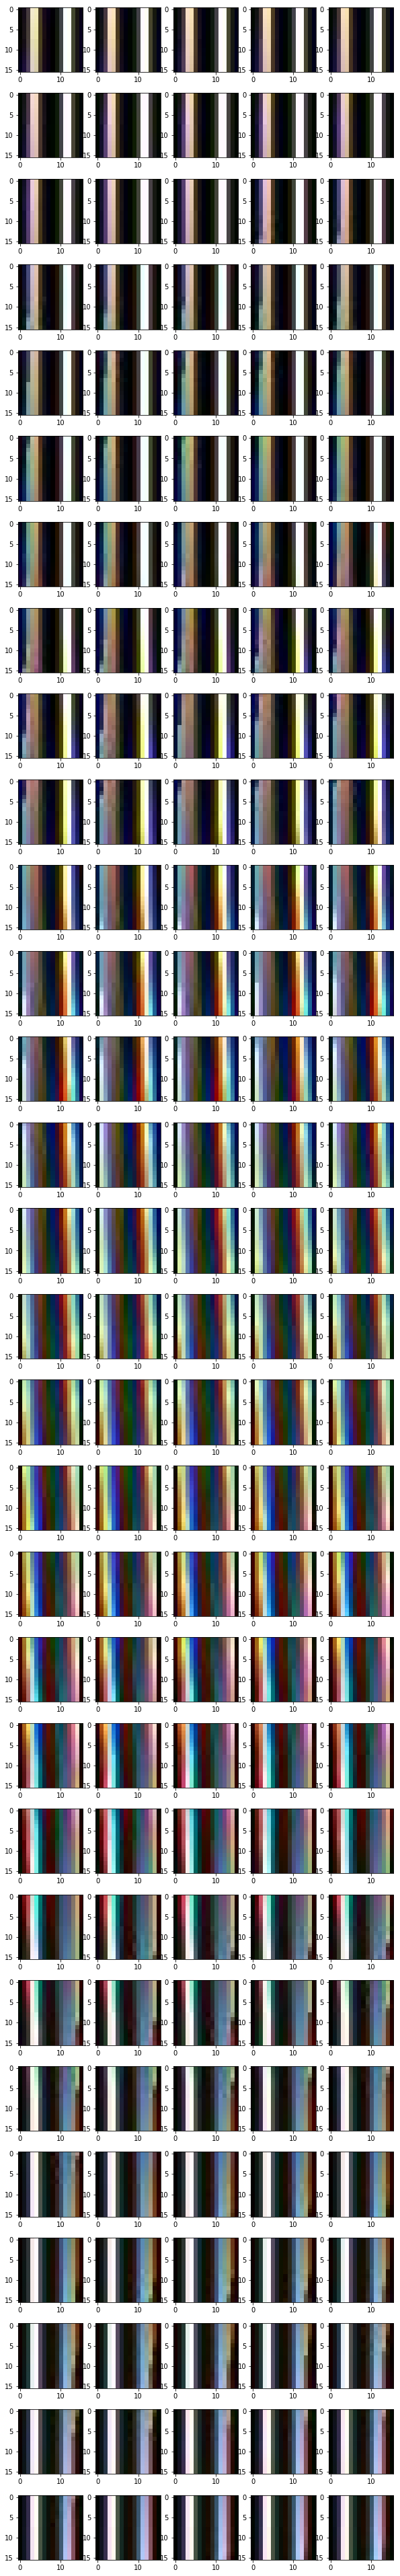

In [23]:
image_list = os.listdir(color_image_path)
image_list.sort()

img_to_show = [color_image_path+img_name for img_name in image_list[253:406]]
num = len(img_to_show)

fig, axes = plt.subplots(floor(num/5),5,figsize=(10,70))

index=0
for i in range(floor(num/5)):
    for j in range(5):
        img = imread(img_to_show[index])
        axes[i][j].imshow(img)
        index+=1

# 2. Data Distribution
- Visualizing the distribution of the angular velocity 

<function matplotlib.pyplot.show(*args, **kw)>

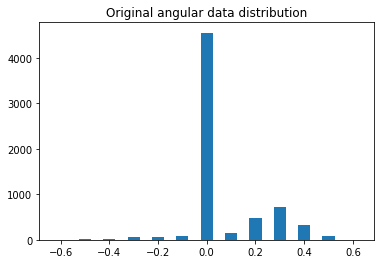

In [20]:
## Plot original data distribution

# main parameter used in np.histogram:
# 1. The data to be count
# 2. The bins list which contains the desired bin value to be counted.
# 3. returned hist and bin_edges are used as the plt.bar parameter
# to plot a distribution histogram
# note that the lenght of bin edges is (length(hist)+1).
import matplotlib.pyplot as plt

# get bins
max_angular = 0.6
min_angular = -0.6

bin_count_angular = 12

bin_interval_angular = (max_angular-min_angular)/bin_count_angular

bins_angular = [min_angular+i*bin_interval_angular for i in range(bin_count_angular+1)]

hist_angular, bin_edges_angular = np.histogram(agl, bins_angular)


plt.figure(1)
plt.bar(bin_edges_angular, np.append(hist_angular, 0), width=0.05)
plt.title("Original angular data distribution")
plt.show

## Notes：

bin_edges_angular = 

hist_angular      =

array((-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4, 0.5,  0.6))

array((   0,    7,    8,   51,   56,   73, 4553,  151,  486,  719,  326, 79))

- np.histogram 在是对一个左闭右开的值区间的统计，因此13个bin值，对应12个区间,并返回12个hist值；
- 但采用plt.bar()默认方式画直方图时，直方图会从最小值开始，在bin值上显示高度，代表此区间数量，如\[0.6,0.5) 0个并在0.6上显示0
- 因此在画第13个bin时，会找不到对应的hist数量，因此我们追加0；
- 因此，bin值左右区间值的选取要超过待统计数据的最值，因为若以最值作为最后一个bin值，则最值不会被统计（不存在对应区间）
